## Descripción del proyecto

La compañía móvil Megaline no está satisfecha al ver que muchos de sus clientes utilizan planes heredados. Quieren desarrollar un modelo que pueda analizar el comportamiento de los clientes y recomendar uno de los nuevos planes de Megaline: Smart o Ultra.

Tienes acceso a los datos de comportamiento de los suscriptores que ya se han cambiado a los planes nuevos (del proyecto del sprint de Análisis estadístico de datos). Para esta tarea de clasificación debes crear un modelo que escoja el plan correcto. Como ya hiciste el paso de procesar los datos, puedes lanzarte directo a crear el modelo.

Desarrolla un modelo con la mayor exactitud posible. En este proyecto, el umbral de exactitud es 0.75. Usa el dataset para comprobar la exactitud.

# Descripción de datos
Cada observación en el dataset contiene información del comportamiento mensual sobre un usuario. La información dada es la siguiente:

- сalls — número de llamadas,
- minutes — duración total de la llamada en minutos,
- messages — número de mensajes de texto,
- mb_used — Tráfico de Internet utilizado en MB,
- is_ultra — plan para el mes actual (Ultra - 1, Smart - 0).

# Instrucciones del proyecto.
- Abre y examina el archivo de datos. Dirección al archivo:datasets/users_behavior.csv Descarga el dataset
- Segmenta los datos fuente en un conjunto de entrenamiento, uno de validación y uno de prueba.
- Investiga la calidad de diferentes modelos cambiando los hiperparámetros. Describe brevemente los hallazgos del estudio.
- Comprueba la calidad del modelo usando el conjunto de prueba.
- Tarea adicional: haz una prueba de cordura al modelo. Estos datos son más complejos que los que habías usado antes así que no será una tarea fácil. Más adelante lo veremos con más detalle.

##  Importar librerias, abrir el archivo de datos

In [1]:
# librerias a trabajar
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import set_config
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
# Archivo a trabajar
df = pd.read_csv(r'C:\Users\yonat\Tripleten\proyectos_tripleten\proyecto_9\Modelo-ML-Arbol-Telecomunicaciones/users_behavior.csv')
print(df.head(),'\n')
print(df.info())

   calls  minutes  messages   mb_used  is_ultra
0     40   311.90        83  19915.42         0
1     85   516.75        56  22696.96         0
2     77   467.66        86  21060.45         0
3    106   745.53        81   8437.39         1
4     66   418.74         1  14502.75         0 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   int64  
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   int64  
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 125.7 KB
None


Valores nulos:
calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0 

Número de filas duplicadas: 0

Valores únicos:
calls        184
minutes     3104
messages     180
mb_used     3200
is_ultra       2 

Análisis estadísticos:
             calls      minutes     messages       mb_used     is_ultra
count  3214.000000  3214.000000  3214.000000   3214.000000  3214.000000
mean     63.038892   438.208787    38.281269  17207.673836     0.306472
std      33.236368   234.569872    36.148326   7570.968246     0.461100
min       0.000000     0.000000     0.000000      0.000000     0.000000
25%      40.000000   274.575000     9.000000  12491.902500     0.000000
50%      62.000000   430.600000    30.000000  16943.235000     0.000000
75%      82.000000   571.927500    57.000000  21424.700000     1.000000
max     244.000000  1632.060000   224.000000  49745.730000     1.000000 

Gráficos de cajas:


C:\Users\yonat\AppData\Local\Temp\ipykernel_17308\3041598155.py:26: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(box_plot_cm, labels=['calls','messages'])


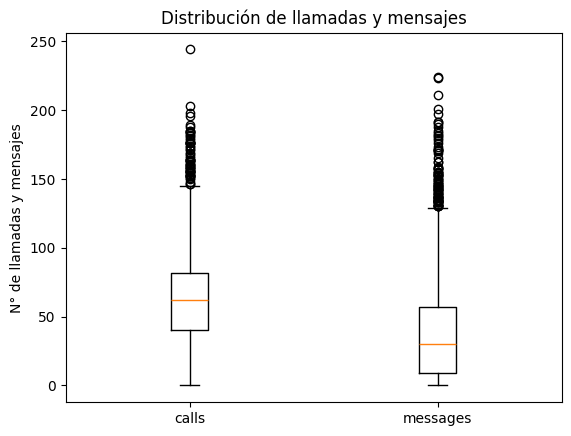

C:\Users\yonat\AppData\Local\Temp\ipykernel_17308\3041598155.py:31: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(box_plot_minutes, labels=['minutes'])


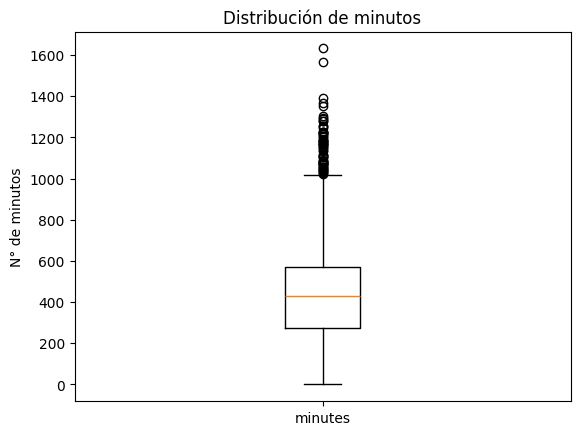

C:\Users\yonat\AppData\Local\Temp\ipykernel_17308\3041598155.py:36: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(box_plot_mb, labels=['mb_used'])


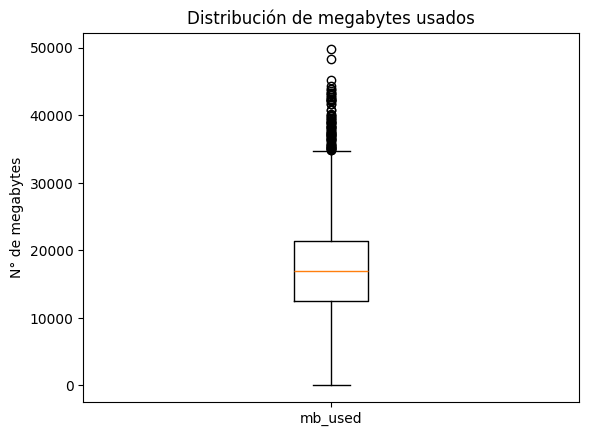

In [3]:
# Lectura de datos

# Valores nulos
print("Valores nulos:")
print(df.isna().sum().to_string(),'\n')

# filas duplicados
filas_duplicadas = df.duplicated().sum()
print(f'Número de filas duplicadas: {filas_duplicadas}\n')

# Valores unicos
print("Valores únicos:")
print(df.nunique().to_string(),'\n')

# Analisis estadistico
print("Análisis estadísticos:")
print(df.describe().to_string(),'\n')

# Gráficos de cajas
print('Gráficos de cajas:')

box_plot_cm = df[['calls','messages']]
box_plot_minutes = df['minutes']
box_plot_mb = df['mb_used']

plt.boxplot(box_plot_cm, labels=['calls','messages'])
plt.title('Distribución de llamadas y mensajes')
plt.ylabel('N° de llamadas y mensajes')
plt.show()

plt.boxplot(box_plot_minutes, labels=['minutes'])
plt.title('Distribución de minutos')
plt.ylabel('N° de minutos')
plt.show()

plt.boxplot(box_plot_mb, labels=['mb_used'])
plt.title('Distribución de megabytes usados')
plt.ylabel('N° de megabytes')
plt.show()



# Comentario del resultado
* El DataFrame no cuenta con valores nulos, ni filas duplicadas.
* Mostramos los valores únicos, vemos dispersión de los valores de cada variable en el df menos en la variable is_ultra que contiene solo 2 valores.
* En el análisis estadístico tenemos sesgo positivo para casi todas las variables menos is_ultra porque sus medianas son menores a la media y esto se ve en el gráfico de cajas mostrando los outliers.

## Segmenta los datos fuente en un conjunto de entrenamiento, uno de validación y uno de prueba.

In [4]:
# Segmentar los datos fuente en entrenamiento, validación y prueba
train_df, test_df = train_test_split(df, test_size=0.30, random_state=12345) # 70% para datos de entrenamiento
valid_df, test_df = train_test_split(test_df, test_size=0.50, random_state=12345) # 15% datos de validación y prueba


# Características y objetivo de entrenamiento, validación y prueba

# 70% en caratericticas y objetivo
features_train = train_df.drop(['is_ultra'], axis=1) # entrenamiento
target_train = train_df['is_ultra']

# 15% en caratericticas y objetivo
features_valid = valid_df.drop(['is_ultra'], axis=1) # validación
target_valid = valid_df['is_ultra']

#15% en caratericticas y objetivo
features_test = test_df.drop(['is_ultra'], axis=1) # prueba
target_test = test_df['is_ultra']

# tamaño de entreamiento, característica y prueba
print(features_train.shape) 
print(features_valid.shape)
print(features_test.shape)




(2249, 4)
(482, 4)
(483, 4)


# Comentario del resultado
* Segmentamos el DataFrame original en 70% entrenamiento, 15% validación y 15% de prueba.
* Tenemos para entrenamiento, validación y prueba sus datos de características y obtetivo(target)

## Investiga la calidad de diferentes modelos cambiando los hiperparámetros.

In [5]:
## Investigando la calidad de diferentes modelos cambiando hiperparámetros:
# Modelo arbol de decisión
print('* Modelo de arbol:\n')
for profundidad in range(1,20): # Cambiamos el hiperparámetro de profundidad del arbol de 1 a 19.
    model_arbol = DecisionTreeClassifier(max_depth=profundidad, random_state=12345)
    model_arbol.fit(features_train,target_train)# entrena el modelo en el conjunto de entrenamiento
    print('Profundidad:', profundidad)
    print('Entrenamiento:', model_arbol.score(features_train,target_train))# calcula la puntuación de accuracy en el conjunto de entrenamiento
    print('Validación:', model_arbol.score(features_valid,target_valid))# calcula la puntuación de accuracy en el conjunto de validación
    print() 

* Modelo de arbol:

Profundidad: 1
Entrenamiento: 0.7554468652734548
Validación: 0.7510373443983402

Profundidad: 2
Entrenamiento: 0.7852378835037794
Validación: 0.7800829875518672

Profundidad: 3
Entrenamiento: 0.8016896398399288
Validación: 0.7863070539419087

Profundidad: 4
Entrenamiento: 0.8043574922187638
Validación: 0.7883817427385892

Profundidad: 5
Entrenamiento: 0.8168074699866608
Validación: 0.7614107883817427

Profundidad: 6
Entrenamiento: 0.8332592263228101
Validación: 0.7842323651452282

Profundidad: 7
Entrenamiento: 0.8457092040907069
Validación: 0.7821576763485477

Profundidad: 8
Entrenamiento: 0.861271676300578
Validación: 0.7821576763485477

Profundidad: 9
Entrenamiento: 0.871498443752779
Validación: 0.7780082987551867

Profundidad: 10
Entrenamiento: 0.8830591373943976
Validación: 0.7883817427385892

Profundidad: 11
Entrenamiento: 0.8941751889728768
Validación: 0.7904564315352697

Profundidad: 12
Entrenamiento: 0.9075144508670521
Validación: 0.7946058091286307

Profund

In [6]:
# Modelo de bosque
print('* Modelo de bosque:\n')
for numero_arboles in range(10,100,10): # Cambiamos el hiperparámetro de número de arboles para el modelo bosque de 10 a 100.
    model_forest = RandomForestClassifier(n_estimators=numero_arboles , random_state=12345)
    model_forest.fit(features_train,target_train)# entrena el modelo en el conjunto de entrenamiento
    print('Número de arboles:', numero_arboles)
    print('Entrenamiento:', model_forest.score(features_train,target_train))
    print('Validación:', model_forest.score(features_valid,target_valid))# calcula la puntuación de accuracy en el conjunto de validación
    print()

* Modelo de bosque:



Número de arboles: 10
Entrenamiento: 0.9826589595375722
Validación: 0.7780082987551867

Número de arboles: 20
Entrenamiento: 0.9924410849266341
Validación: 0.7904564315352697

Número de arboles: 30
Entrenamiento: 0.9982214317474433
Validación: 0.7863070539419087

Número de arboles: 40
Entrenamiento: 0.9982214317474433
Validación: 0.7946058091286307

Número de arboles: 50
Entrenamiento: 0.9991107158737217
Validación: 0.7904564315352697

Número de arboles: 60
Entrenamiento: 0.9991107158737217
Validación: 0.7925311203319502

Número de arboles: 70
Entrenamiento: 0.9995553579368608
Validación: 0.7987551867219918

Número de arboles: 80
Entrenamiento: 1.0
Validación: 0.7966804979253111

Número de arboles: 90
Entrenamiento: 1.0
Validación: 0.7966804979253111



In [7]:
# Modelo de regresión logistica
print('* Modelo de regresión logística:\n')
model_rl =  LogisticRegression(random_state=12345, solver='liblinear')# inicializa el constructor de regresión logística con los parámetros random_state=54321 y solver='liblinear'
model_rl.fit(features_train, target_train) # entrena el modelo en el conjunto de entrenamiento
print("Entrenamiento:", model_rl.score(features_train, target_train)) # calcula la puntuación de accuracy en el conjunto de entrenamiento
print("Validación:", model_rl.score(features_valid, target_valid)) # calcula la puntuación de accuracy en el conjunto de validación


* Modelo de regresión logística:

Entrenamiento: 0.6989773232547799
Validación: 0.6950207468879668


In [8]:
## Modelos a escoger con mejor metrica de exactitud, respentando el umbral de exactitud > 0.75 como lo exige el proyecto

# Modelo de arbol con 3 niveles de profundidad
print('* Modelo de arbol:')
model_arbol = DecisionTreeClassifier(max_depth=3, random_state=12345)
model_arbol.fit(features_train,target_train)
print('Profundidad:', 3 )
print('Entrenamiento:', model_arbol.score(features_train,target_train))
print('Validación:', model_arbol.score(features_valid,target_valid),'\n')

# Modelo de bosque con 20 arboles
print('* Modelo de bosque:')
model_forest = RandomForestClassifier(n_estimators=20 , random_state=12345)
model_forest.fit(features_train,target_train)
print('Número de arboles:', 20)
print('Entrenamiento:', model_forest.score(features_train,target_train))
print('Validación:', model_forest.score(features_valid,target_valid),'\n')
    
# Modelo de regresión logística 
print('* Modelo de regresión logística:')
model_rl =  LogisticRegression(random_state=12345, solver='liblinear')
model_rl.fit(features_train, target_train)
print("Entrenamiento:", model_rl.score(features_train, target_train)) 
print("Validación:", model_rl.score(features_valid, target_valid)) 


* Modelo de arbol:
Profundidad: 3
Entrenamiento: 0.8016896398399288
Validación: 0.7863070539419087 

* Modelo de bosque:
Número de arboles: 20
Entrenamiento: 0.9924410849266341
Validación: 0.7904564315352697 

* Modelo de regresión logística:
Entrenamiento: 0.6989773232547799
Validación: 0.6950207468879668


# Comentario del resultado
* Tenemos los 3 modelos arbol de decisión, bosque aleatorio y regresión logística con distintos hiperparámetros.
* El modelo de arbol de decisión tiene profundidad de 1 a 19 arboles, bajo el criterio de a mayor profundidad mayor ajuste escogemos la profundidad 3, porque a partir de 3 baja la metrica de exactitud para la validación.
* El modelo de bosque aleatorio es por el número de arboles, igual al criterio de profundidad a mayores arboles mayor ajuste, en este caso vamos de 10 en 10 arboles hasta 100 y escogemos 20 arboles porque a partir de ahi comienza a reducir la exactitud para a validación.
* El modelo de regresión logística no tiene hiperparámetros, pero indicamos el parámetro solver=liblinear  para escoger el algoritmo que se adapta mejor al tamaño de los datos.


## Comprueba la calidad del modelo usando el conjunto de prueba.

In [9]:
# Usando el conjunto de prueba
# Modelo de arbol 
print('* Modelo de arbol:')
print('Profundidad:', 2)
print('Entrenamiento:', model_arbol.score(features_train,target_train))
print('Validación:', model_arbol.score(features_valid,target_valid))
print('Prueba:', model_arbol.score(features_test,target_test),'\n') # usando la métrica exactitud para el conjunto de prueba

# Modelo de bosque 
print('* Modelo de bosque:')
print('Número de arboles:', 20)
print('Entrenamiento:', model_forest.score(features_train,target_train))
print('Validación:', model_forest.score(features_valid,target_valid))
print('Prueba:', model_forest.score(features_test,target_test),'\n') # usando la métrica exactitud para el conjunto de prueba
    
# Modelo de regresión logística 
print('* Modelo de regresión logística:')
print("Entrenamiento:", model_rl.score(features_train, target_train)) 
print("Validación:", model_rl.score(features_valid, target_valid))
print('Prueba:', model_rl.score(features_test,target_test),'\n') # usando la métrica exactitud para el conjunto de prueba


* Modelo de arbol:
Profundidad: 2
Entrenamiento: 0.8016896398399288
Validación: 0.7863070539419087
Prueba: 0.7888198757763976 

* Modelo de bosque:
Número de arboles: 20
Entrenamiento: 0.9924410849266341
Validación: 0.7904564315352697
Prueba: 0.782608695652174 

* Modelo de regresión logística:
Entrenamiento: 0.6989773232547799
Validación: 0.6950207468879668
Prueba: 0.6977225672877847 



# Comentario del resultado

* Escogemos de los 3 modelos al modelo de arbol porque con 3 arboles tiene un entrenamiento de 80% y validación de 78% y prueba del 78% a diferencia de el bosque aleatorio que tiene similar validación y prueba pero entrenamiento de 99% indicio de estar sobreajustado, por otro lado la regresión logística no cumple con las exigencias del proyecto al tener una exactitud de validación < 75%.

## Prueba de cordura al modelo.

In [10]:
# Segmentar los datos fuente en entrenamiento_prueba_de_cordura y test_prueba_de_cordura)


train_prueba_de_cordura, test_prueba_de_cordura = train_test_split(df, test_size=0.30, random_state=12345)

# 70% datos
features_train_pc = train_prueba_de_cordura.drop(['is_ultra'], axis=1)
target_train_pc = train_prueba_de_cordura['is_ultra']

# 30% datos
features_test_pc = test_prueba_de_cordura.drop(['is_ultra'], axis=1)
target_test_pc = test_prueba_de_cordura['is_ultra']



model_arbol.fit(features_train_pc, target_train_pc) # entrenar modelo recomendado para prueba de cordura (model_arbol)

test_predictions = model_arbol.predict(features_test_pc)


def accuracy(answers, predictions):
    correct = 0
    for i in range(len(answers)):
        if answers.iloc[i] == predictions[i]:
            correct += 1
    return correct / len(answers)

print('Prueba de cordura:')
print('Accuracy:', accuracy(target_test_pc, test_predictions))


Prueba de cordura:
Accuracy: 0.7875647668393783


## Conclusión general

Paso 1: **Descripción del proyecto:**

* La compañía móvil Megaline no está satisfecha al ver que muchos de sus clientes utilizan planes heredados. Quieren desarrollar un modelo que pueda analizar el comportamiento de los clientes y recomendar uno de los nuevos planes de Megaline: Smart o Ultra.

Paso 2: **Importar librerias, abrir el archivo de datos**

* Importarmos las librerias a trabajar como pandas, matplotlib, scikit-learn y sus diferentes modulos para uso de importar la base de datos, generar visualización, tratamiento, análisis de datos como los gráficos correspondientes y por último generar los diferentes modelos para su recomendación.



paso 3: **Segmenta los datos fuente en un conjunto de entrenamiento, uno de validación y uno de prueba.**

* Segmentamos los datos para entrenamiento, validación y prueba. El peso es de 70%, 15% y 15% respectivamente para usarlos en los diferentes modelos desarrollados como arboles de decisión, bosque aleatorio y regresión lineal.

* 70% del conjunto de datos:

  * features_train = train_df.drop(['is_ultra'], axis=1) # entrenamiento
  * target_train = train_df['is_ultra']

* 15% del conjunto de datos para validación:
  * features_valid = valid_df.drop(['is_ultra'], axis=1) # validación
  * target_valid = valid_df['is_ultra']

* 15% del conjunto de datos para prueba
   * features_test = test_df.drop(['is_ultra'], axis=1) # prueba
   * target_test = test_df['is_ultra']



Paso 4: **Investiga la calidad de diferentes modelos cambiando los hiperparámetros.**

* Con respecto al modelo de arbol de decisión se utilizo los diferentes hiperparámetros de profundidad desde 1 hasta 19 para ver como se comporta la métrica de exactitud en la validación, se utilizo un random_state para obtener el mismo modelo para todas las profundidades.

* El modelo de bosque aleatorio se cambio los hiperparámetros de número de arboles(n_estimators) desde 10 hasta 100 arboles de 10 en 10, se fijo random_state para obtener el mismo modelo.

* El modelo de regresión logística no cuenta con hiperparámetros pero se especifico el solver=liblinear para utilizar el algoritmo adecuado al dataset, random_state para obtener el mismo modelo.

Paso 5: **Calidad del modelo usando el conjunto de prueba.**

* Los 3 modelos con sus diferentes tamaños de características y objetivos se utilizaro para la métrica de prueba.
* El modelo con el mejor resultado y para recomendar a la empresa Megaline es arbol de decisión porque sus nivel de entrenamiento es de 80% y validación de 78% y prueba del 78% a diferencia de el bosque aleatorio que tiene similar validación y prueba pero entrenamiento de 99% indicio de estar sobreajustado, por otro lado la regresión logística no cumple con las exigencias del proyecto al tener una exactitud de validación < 75%.
* Al parecer nuestro modelo esta subajustado porque el nivel de entrenamiento es de 80% y la validación y prueba son menores pero las otras opciones de bosque aleatorio que muestra un sobreajuste y la regresión lineal al no cumplir con las métricas del modelo seria nuestra mejor opción.

Paso 6: **Prueba de cordura al modelo.**

* La prueba de cordura muestra que nuestro modelo esta funcionando en buenas condiciones al convertir el DataFrame original en similar tamaño al que fue entrenado.
* El DataFrame original se segmento en 70% de caracterícticas y 30% objetivo para nuestra prueba de cordura.
* Utilizamos nuestro modelo recomendado que es model_arbol para entrenarlo 'model_arbol.fit(features_train_pc, target_train_pc)' y que realice las predicciones al objetivo 'test_predictions = model_arbol.predict(features_test_pc)'.
* Finalmente le realizamos que tan bien predijo nuestro modelo con respecto al target y obtenemos un resultado de 78% superior a la métrica exigida del proyecto.

Objetivo del proyecto: **Desarrollar un modelo que pueda analizar el comportamiento de los clientes y recomendar uno de los nuevos planes de Megaline: Smart o Ultra.**

Recomendaciones:

1. Se recomienda utilizar el modelo de arbol de decisión por su cumplir con las métricas del proyecto exactitud superior al 75% para los niveles de validación y prueba.
2. La prueba de cordura muestra la robuztes del modelo siendo el resultado de accuracy del 78%.
3. El modelo de bosque aleatorio es para una data más grande, al ser la